idea what the data could look like
(17890902, {'nom': 'Conseils Generaux', 'ville': 'versaille', 'sequenceHistorique': ''})
(timestamp1, {'a':False, 'b':False, 'c':False}),
(timestamp2, {'a':False, 'b':True, 'c':False}),
(timestamp3, {'a':False, 'b':False, 'c':False}), 
(timestamp4, {'a':False, 'b':True, 'c':False}),
https://stackoverflow.com/questions/38465620/looking-for-an-efficient-way-to-store-history-data

### 1) RECUPERATION DU CONTENU DE LA PAGE WIKIPEDIA <br>
https://fr.wikipedia.org/wiki/Chronologie_de_la_R%C3%A9volution_fran%C3%A7aise <br>

In [1]:
#Requête
# Importer les modules nécessaires
import requests

# Récupérer l'Url
r = requests.get("https://fr.wikipedia.org/wiki/Chronologie_de_la_R%C3%A9volution_fran%C3%A7aise")

# Enregistrer le contenu dans un fichier
with open("response.html", "w") as f:
    f.write(r.text)
    f.close() 


In [2]:
#La soupe
# Importer les modules nécessaires
from bs4 import BeautifulSoup
import json

# Lire le fichier contenant le contenu
with open("response.html", "r") as f:
 
# Parser l'html pour récupérer les <h2>, <h3> et <li> visés
    soup = BeautifulSoup(f, 'html.parser')

periode = []
annee = []
dateEtEvenement = []
dates = soup.find(class_="mw-body-content").find_all("li", class_=False)
for date in dates:
    if date.find_previous("h3") == None:
        periode.append(date.find_previous("h2").text)
        annee.append(0)
        dateEtEvenement.append(date.text)
    else:
        periode.append(date.find_previous("h2").text)
        annee.append(date.find_previous("h3").text)
        dateEtEvenement.append(date.text)

# Sauvegarder les fichiers
with open("periode.json", "w") as f:
    json.dump(periode, f)
    f.close() 
with open("annee.json", "w") as f:
    json.dump(annee, f)
    f.close() 
with open("dateEtEvenement.json", "w") as f:
    json.dump(dateEtEvenement, f)
    f.close() 

### 2) NETTOYAGE DES DONNEES <br>

In [10]:
#Nettoyage de donnée
# Importer les modules nécessaires
import pandas as pd
import numpy as np
import dateparser
import json

# Lire les jsons et récupérer les listes
with open("periode.json", "r") as f:
    periode = json.load(f)
with open("annee.json", "r") as f:
    annee = json.load(f)
with open("dateEtEvenement.json", "r") as f:
    dateEtEvenement = json.load(f)
    
# Construire le dataframe 
df = pd.DataFrame ({'Période': periode, 'Année': annee, 'dateEtEvenement': dateEtEvenement})

# Processus de récupération du datetime
df[["date","Evenement"]] = df["dateEtEvenement"].str.split(":", n = 1, expand = True)

df["Année"] = df["Année"].replace(0, "1788")

df["datetime"] = df["date"].astype('str') + " " + df["Année"].astype('str')

df["datetimeParse"] = df["datetime"].apply(dateparser.parse)
df["datetimeParse"] = pd.to_datetime(df["datetimeParse"])

df["level"] = [np.random.randint(-15,-2) if (i%4)==0 else np.random.randint(2,15) for i in range(len(df))]
print(df.columns)
df2 = df2[["datetimeParse", "Evenement", "level"]]

Index(['Période', 'Année', 'dateEtEvenement', 'date', 'Evenement', 'datetime',
       'datetimeParse', 'level'],
      dtype='object')


1791-03-15 00:00:00 1788-06-07 00:00:00


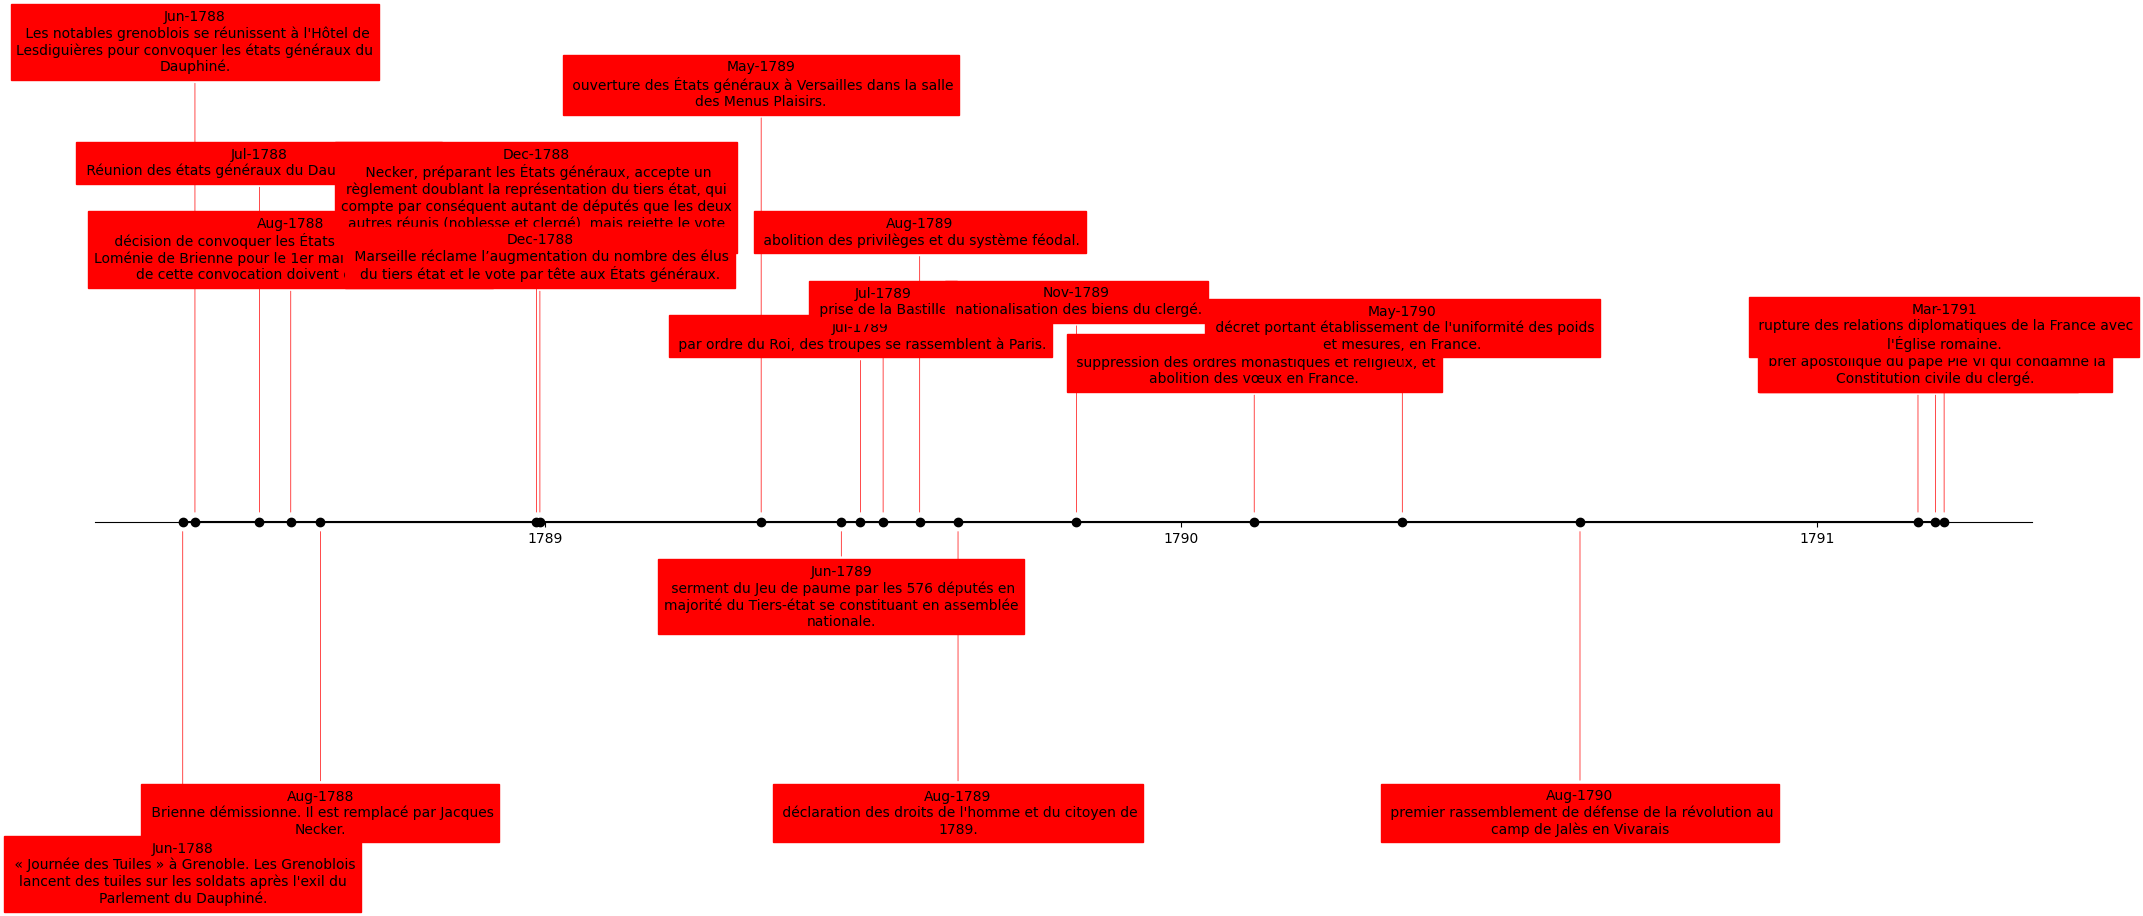

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime
df3 = df2.head(500)

# Créer la figure
fig, ax = plt.subplots(figsize=(25, 9))

# Ligne horizontale 
ax.plot(df3.datetimeParse, [0,]* len(df3), "-o", color="black")

# Limite y
ax.set_ylim(-10, 10)

# Ploter les ticks
ticks = pd.date_range(str(min(df3["datetimeParse"])), str(max(df3["datetimeParse"])), freq="YS")
theRange = range(int(min(df3["datetimeParse"]).year), int(max(df3["datetimeParse"]).year))
ax.set_xticks(ticks, theRange)
ax.set_xticklabels([d.year for d in ticks], rotation=90, ha='right')

# Merge x-axis & ligne horizontale
ax.spines["bottom"].set_position(("axes", 0.5))

for idx in range (len(df3)):
    dt, evenement, level  = df3["datetimeParse"][idx], df3["Evenement"][idx], df3["level"][idx]
    dt_str = dt.strftime("%b-%Y")
    an =  ax.annotate(dt_str + "\n" + evenement
                , xy=(dt, 0.2 if level>0 else -0.2)
                , xytext=(dt, level)
                , arrowprops=dict(arrowstyle="-",color="red",linewidth=0.5)
                , backgroundcolor="red"
                , ha="center"
                , wrap = True
                     )
    an._get_wrap_line_width = lambda : 400.

ax.spines[["left", "top", "right"]].set_visible(False)
ax.yaxis.set_visible(False)
print(max(df3.datetimeParse), min(df3.datetimeParse))
plt.show()

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime
#print(df.columns)
#Index(['Période', 'Année', 'dateEtEvenement', 'date', 'Evenement', 'datetime',  'datetimeParse', 'level'],
print(df['Période'].unique())

# Créer la figure
fig, ax = plt.subplots(figsize=(16, 9))

# Ligne horizontale 
ax.plot(df3.datetimeParse, [0,]* len(df3), "-o", color="black")
"""
# Limite y
ax.set_ylim(-10, 10)

# Ploter les ticks
ticks = pd.date_range(str(min(df3["datetimeParse"])), str(max(df3["datetimeParse"])), freq="YS")
theRange = range(int(min(df3["datetimeParse"]).year), int(max(df3["datetimeParse"]).year))
ax.set_xticks(ticks, theRange)
ax.set_xticklabels([d.year for d in ticks], rotation=90, ha='right')
"""
plt.show()

['Prélude (année 1788)' 'Constituante (1789-1791)'
 'Législative (1791-1792) et Première Coalition'
 'Insurrections fédéralistes (1792-1793)'
 'Convention girondine (1792-1793) et Première Coalition'
 'Convention montagnarde (1793-1794) et Première Coalition'
 'Guerre du Roussillon (1793-1795)' 'Guerre de Vendée et Chouannerie'
 'Convention thermidorienne (1794-1795) et Première Coalition'
 'Directoire (1795-1798) et Première Coalition'
 "Campagne d'Italie (1796-1797)" "Expéditions d'Irlande de 1796 et 1798"
 "Campagne d'Égypte" 'Batailles de la révolution haïtienne'
 'Mer Méditerranée' 'Manche - mer du Nord - mer Baltique'
 'Batailles de la campagne des Antilles et de Guyane' 'Océan Atlantique'
 'Notes et références' 'Voir aussi']


'\n# Créer la figure\nfig, ax = plt.subplots(figsize=(16, 9))\n\n# Ligne horizontale \nax.plot(df3.datetimeParse, [0,]* len(df3), "-o", color="black")\n\n# Limite y\nax.set_ylim(-10, 10)\n\n# Ploter les ticks\nticks = pd.date_range(str(min(df3["datetimeParse"])), str(max(df3["datetimeParse"])), freq="YS")\ntheRange = range(int(min(df3["datetimeParse"]).year), int(max(df3["datetimeParse"]).year))\nax.set_xticks(ticks, theRange)\nax.set_xticklabels([d.year for d in ticks], rotation=90, ha=\'right\')\n'

Source : <br>
https://www.geeksforgeeks.org/web-scraping-from-wikipedia-using-python-a-complete-guide/ <br>
https://stackoverflow.com/questions/31126596/saving-response-from-requests-to-file/ <br>
https://coderzcolumn.com/tutorials/data-science/timeline-using-matplotlib/ <br>